In [1]:
import pandas as pd
import numpy as np

In [2]:
churn = pd.read_csv("C:/PRASAD wORKS/Python Works/Final Intellipaat - Submission/R/Assignments/customer_churn.csv")

TASK A

In [3]:
sum(churn['gender']=='Male')

3555

In [4]:
sum(churn['InternetService']=='DSL')

2421

In [5]:
new_churn = churn[(churn['gender']=='Female') & 
(churn['SeniorCitizen']==1) & (churn['PaymentMethod']=='Mailed check')]

In [6]:
new_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [12]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

new_churn1 = churn[(churn['tenure'] < 10) | (churn['TotalCharges'] < 500)]
new_churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


TASK B

In [14]:
names = churn['Churn'].value_counts().keys().tolist()
sizes = churn['Churn'].value_counts().tolist()

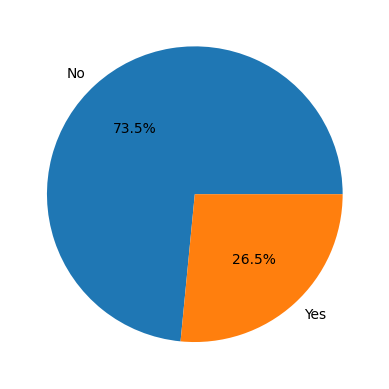

In [16]:
import matplotlib.pyplot as plt
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show() 

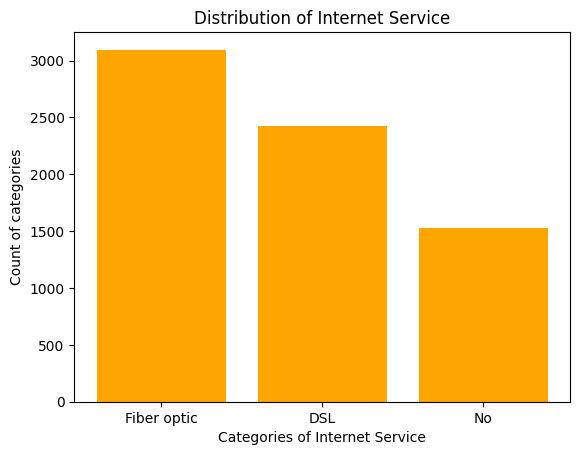

In [18]:
plt.bar(churn['InternetService'].value_counts().keys().tolist(),churn['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show() 

TASK C

In [19]:
#Task a
x=churn[['tenure']]
y=churn[['Churn']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42) 

In [35]:
x.head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [20]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are your target variables with string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_train_encoded and y_test_encoded contain numeric labels suitable for binary classification


c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [34]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 

Epoch 1/150


UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\kernelapp.py", line 728, in start

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\PRASAD\AppData\Local\Temp\ipykernel_2412\795396598.py", line 1, in <module>

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_1081]

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'data' is your DataFrame with 'tenure' and 'Churn' columns
# Make sure 'Churn' is binary (0 or 1)

# Data preprocessing
X = churn[['tenure']]
y = churn['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [42]:
# Assuming y_train and y_test are your target variables with string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardize the data (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the sequential model
model = Sequential()

# Add input layer
model.add(Dense(12, input_dim=1, activation='relu'))

# Add hidden layer
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training set using y_train_encoded
history = model.fit(X_train_scaled, y_train_encoded, epochs=150, verbose=0)


In [43]:
# Evaluate the model on the test set using y_test_encoded
accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test Accuracy: {accuracy[1]}')

45/45 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7566
Test Accuracy: 0.7565649151802063


45/45 [==============================] - 0s 2ms/step


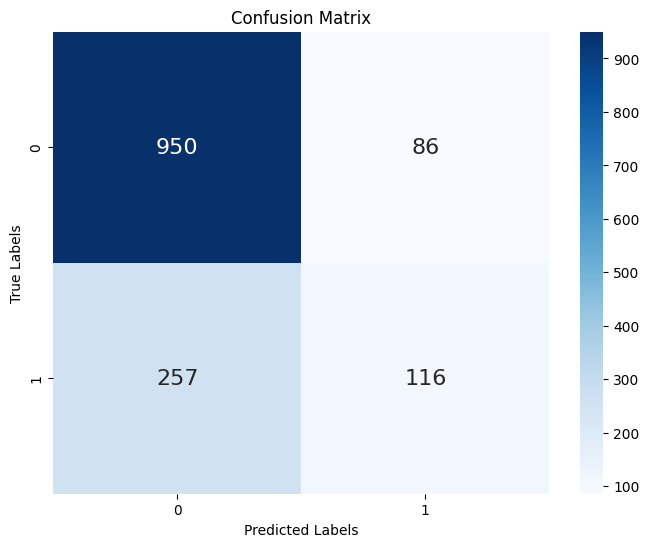

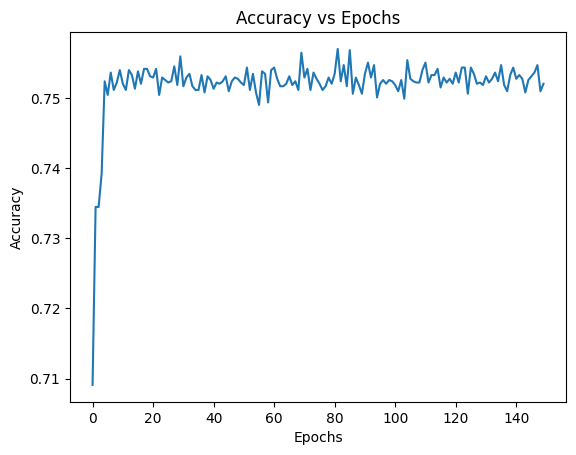

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict values on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Build a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot 'Accuracy vs Epochs' graph
plt.plot(history.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
X = churn[['tenure']]
y = churn['Churn']

In [57]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the second sequential model with dropout layers
model2 = Sequential()

model2.add(Dense(12, input_dim=1, activation='relu'))
model2.add(Dropout(0.3))  # Dropout layer added

# Add hidden layer with dropout
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.2))  # Dropout layer added

# Add output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training set
history2 = model2.fit(X_train_scaled, y_train, epochs=150, verbose=0)

45/45 [==============================] - 0s 2ms/step


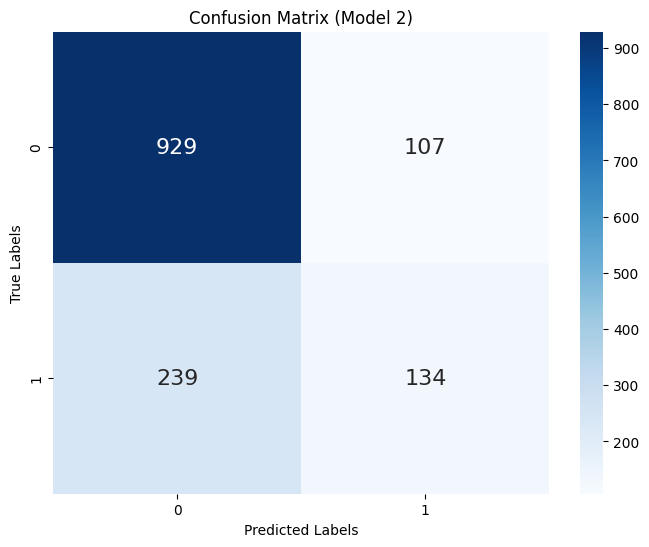

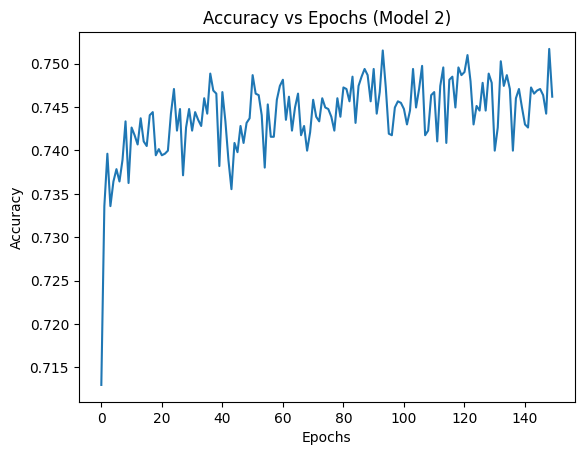

In [59]:
y_pred2 = model2.predict(X_test_scaled)
y_pred_binary2 = (y_pred2 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Build a confusion matrix for the second model
conf_matrix2 = confusion_matrix(y_test, y_pred_binary2)

# Plot the confusion matrix for the second model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Model 2)')
plt.show()

# Plot 'Accuracy vs Epochs' graph for the second model
plt.plot(history2.history['accuracy'])
plt.title('Accuracy vs Epochs (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [61]:
accuracy2 = model2.evaluate(X_test_scaled, y_test)[1]
print(f'Test Accuracy (Model 2): {accuracy2}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7544
Test Accuracy (Model 2): 0.7544357776641846


In [82]:
from tensorflow.keras.utils import to_categorical



# Data preprocessing for the third model
X3 = churn[['tenure', 'MonthlyCharges', 'TotalCharges']]
y3 = churn['Churn']

# Encode target variable 
label_encoder3 = LabelEncoder()
y_encoded3 = label_encoder3.fit_transform(y3)  

# One-hot encode the target variable
y_one_hot3 = to_categorical(y_encoded3)
y_test3 = to_categorical(y_test3)
# Split the data into training and test sets for the third model
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_one_hot3, test_size=0.2, random_state=42)

# Standardize the data for the third model (optional but often recommended for neural networks)
scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

# Build the third sequential model
model3 = Sequential()

# Add input layer for the third model
model3.add(Dense(12, input_dim=3, activation='relu'))

# Add hidden layer for the third model
model3.add(Dense(8, activation='relu'))

# Add output layer for the third model
model3.add(Dense(2, activation='softmax'))  # 2 neurons for binary classification

# Compile the third model
model3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the third model on the training set
history3 = model3.fit(X_train_scaled3, y_train3, epochs=150, validation_data=(X_test_scaled3, y_test3))


Epoch 1/150
177/177 [==============================] - 1s 4ms/step - loss: 0.5907 - accuracy: 0.7357 - val_loss: 0.5800 - val_accuracy: 0.7353
Epoch 2/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7345 - val_loss: 0.5779 - val_accuracy: 0.7353
Epoch 3/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5791 - accuracy: 0.7345 - val_loss: 0.5780 - val_accuracy: 0.7353
Epoch 4/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7345 - val_loss: 0.5779 - val_accuracy: 0.7353
Epoch 5/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5790 - accuracy: 0.7345 - val_loss: 0.5780 - val_accuracy: 0.7353
Epoch 6/150
177/177 [==============================] - 1s 4ms/step - loss: 0.5791 - accuracy: 0.7345 - val_loss: 0.5779 - val_accuracy: 0.7353
Epoch 7/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5789 - accuracy: 0.7345 - val_loss: 0.5781 - val_accuracy: 0.7353

In [81]:
np.mean(history3.history['accuracy'])

0.7344219628969828

45/45 [==============================] - 0s 3ms/step


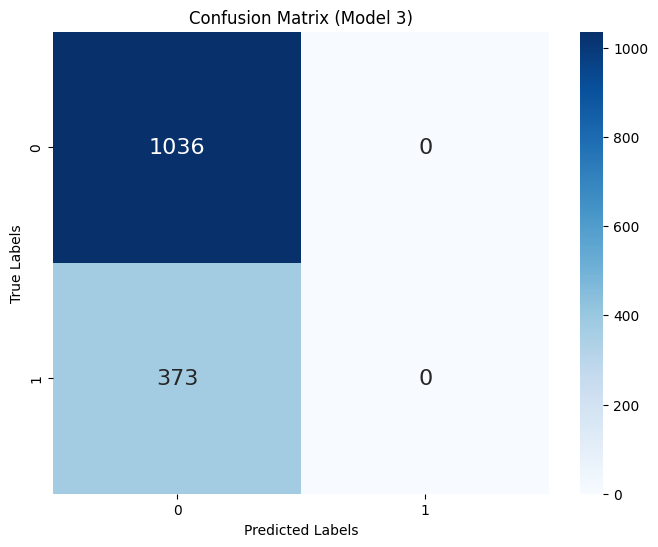

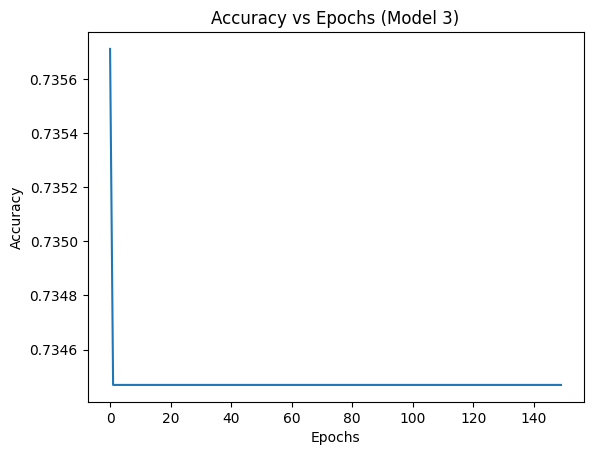

In [87]:
y_pred_proba3 = model3.predict(X_test_scaled3)
y_pred3 = np.argmax(y_pred_proba3, axis=1)  # Convert probabilities to class predictions

# Build a confusion matrix for the third model
conf_matrix3 = confusion_matrix(np.argmax(y_test3, axis=1), y_pred3)

# Plot the confusion matrix for the third model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Model 3)')
plt.show()

# Plot 'Accuracy vs Epochs' graph for the third model
plt.plot(history3.history['accuracy'])
plt.title('Accuracy vs Epochs (Model 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Epoch 1/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6076 - accuracy: 0.9791 - val_loss: 0.4996 - val_accuracy: 1.0000
Epoch 2/150
155/155 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 1.0000 - val_loss: 0.2730 - val_accuracy: 1.0000
Epoch 3/150
155/155 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 1.0000
Epoch 4/150
155/155 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 5/150
155/155 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 6/150
155/155 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 7/150
155/155 [==============================] - 1s 4ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 1.0000

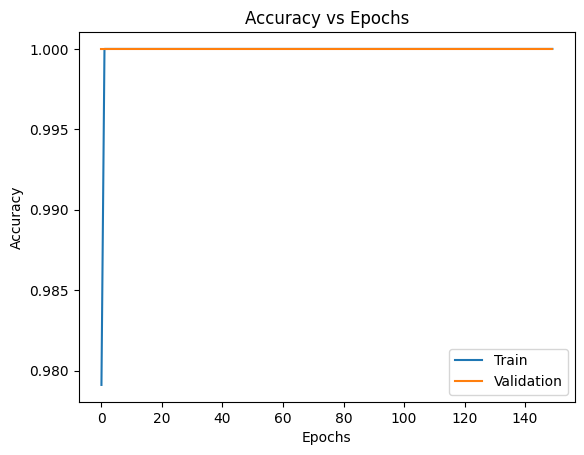

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt


# Data preprocessing
x = churn[['MonthlyCharges', 'tenure', 'TotalCharges']]  # Features
y = churn['Churn']  # Target

# Encode target variable
y_encoded = (y == 'YES').astype(int)  

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.30, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 1 neuron for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=150, validation_data=(x_test_scaled, y_test))

# Predict values on the test set
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Plot 'Accuracy vs Epochs' graph
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
